In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = np.arange(1, 11)
y = 7*x + 5 + 7*np.random.randn(10)

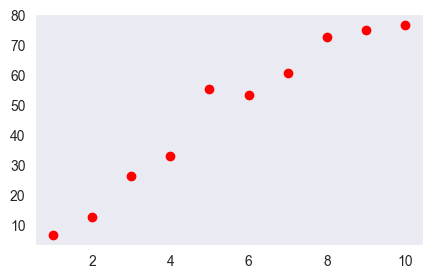

In [206]:
plt.figure(figsize=(5,3))
plt.plot(x, y, 'ro')
plt.grid()
plt.show()

In [207]:
x = np.arange(1, 11)
y = x**2 - 7*x + 5 + 7*np.random.randn(10)

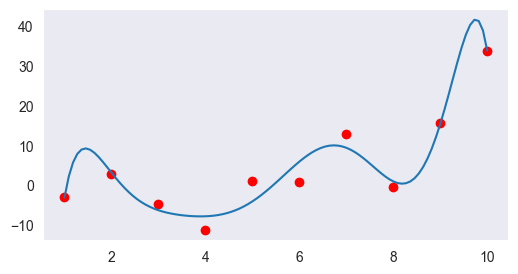

In [208]:
multipliers = np.polyfit(x, y, 8)
p = np.poly1d(multipliers)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
xx = np.linspace(1, 10, 100)
yy = p(xx)
plt.figure(figsize=(6,3))
plt.plot(x, y, 'ro')
plt.plot(xx, yy)
plt.grid()
plt.show()

In [209]:
S_train = np.sqrt(sum((p(x) - y)**2))
S_test = np.sqrt(np.sum((p(x_test) - y_test) ** 2))
print(S_train)
print(S_test)

8.919499983549313
5.300979402616312


In [210]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [211]:
X = iris.drop(columns = 'species')
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test: .2f}")

Accuracy of kNN classifier on the test set:  0.96


# Cross validation

In [212]:
X = iris.drop(columns = 'species')
y = iris['species']
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [213]:
average_accuracy = np.mean(scores)
print(f"Average accuracy of kNN classifier: {average_accuracy:.2f}")

Average accuracy of kNN classifier: 0.97
